In [16]:
import sys
from sklearn import svm
from sklearn import metrics
from mlpath import mlquest as mlq
import numpy as np
sys.path.append('../../')
from DataPreparation.Ingestion.Ingestion import read_data, visualize_data
from DataPreparation.Preprocessing.Preprocessing import preprocess_data
from FeatureExtraction.Rand.Rand import apply_rand

In [17]:
mlq.start_quest('Rand-SVM', table_dest='../../')

#### Ingestion

100%|██████████| 4/4 [00:00<00:00, 133.69it/s]


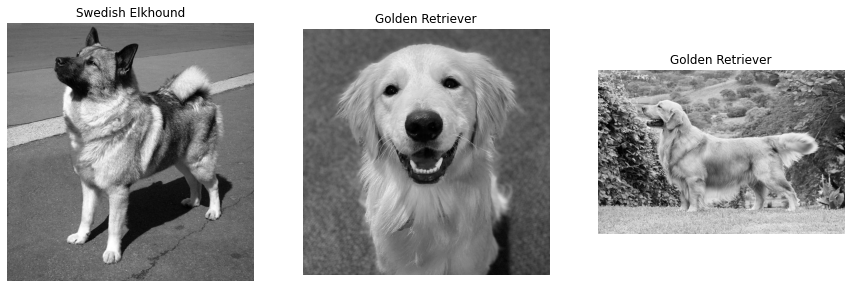

In [18]:
x_train_i, x_val_i, y_train_i, y_val_i = read_data()
visualize_data(x_train_i, y_train_i)

#### Preprocessing

In [19]:
x_train_p, x_val_p = preprocess_data(x_train_i, x_val_i)

#### Feature Extraction: Fractal Features

In [20]:
x_train_f, x_val_f = mlq.l(apply_rand)(x_train_p, x_val_p, num_samples=99)

#### Initiating the Model

In [21]:
model = mlq.l(svm.SVC)(kernel='rbf', C=9.2, gamma=0.001, degree=3)

#### Training the model

In [22]:
model.fit(x_train_f, y_train_i)

SVC(C=9.2, gamma=0.001)

#### Validate the model

In [23]:
F1 = metrics.f1_score(y_val_i, model.predict(x_val_f), average='macro').item()
mlq.log_metrics(F1)

In [24]:
mlq.end_quest()

#### Show Logs

In [25]:
mlq.show_logs(quest_name='Rand-SVM', table_dest='../../', last_k=10)